In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2023-01-09 10:27:43.269015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
#checking if there are any null values
data.isnull().values.any()
#No null values

False

In [5]:
#now we have to look at the date column and make sure it is in datetime.
data.Date

0       2018-09-28
1       2018-09-27
2       2018-09-26
3       2018-09-25
4       2018-09-24
           ...    
2030    2010-07-27
2031    2010-07-26
2032    2010-07-23
2033    2010-07-22
2034    2010-07-21
Name: Date, Length: 2035, dtype: object

In [6]:
#dtype=object so it is a string we need to change this

data.Date=pd.to_datetime(data.Date)
data.Date

#This has been resolved

0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
          ...    
2030   2010-07-27
2031   2010-07-26
2032   2010-07-23
2033   2010-07-22
2034   2010-07-21
Name: Date, Length: 2035, dtype: datetime64[ns]

In [15]:
df=data[['Date','Close']]
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)

/var/folders/q3/qnmsstfj6vxgqnpl92nbdbr40000gr/T/ipykernel_14179/270846843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(ascending=True,inplace=True)


In [16]:
df.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65


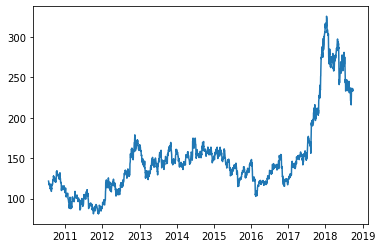

In [17]:
plt.plot(df)

In [19]:
#we need to normalise data as LSTMs are sensitive to scale

scaling = MinMaxScaler(feature_range=(0, 1))
df = scaling.fit_transform(df)

In [56]:
#Getting a training and testing set 

train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]
print(len(train), len(test))

1424 611


In [69]:
def datasetting(dataset, targetting=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-targetting-1):
        a = dataset[i:(i+targetting), 0]
        dataX.append(a)
        dataY.append(dataset[i + targetting, 0])
    return np.array(dataX), np.array(dataY)

In [71]:
print(datasetting(df,targetting=1))
#As expected our function gives us 2 arrays one tracking behind the other by our targetting value

(array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62234477],
       [0.63378268],
       [0.62622549]]), array([0.16319444, 0.1621732 , 0.14971405, ..., 0.63378268, 0.62622549,
       0.62214052]))


In [72]:
#Now we will prepare the training and test datasets

targetting = 1
trainX, trainY = datasetting(train, targetting)
testX, testY = datasetting(test, targetting)

# reshape input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [73]:
# creating and fitting LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, targetting)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1422/1422 - 6s - loss: 0.0021 - 6s/epoch - 4ms/step
Epoch 2/100
1422/1422 - 3s - loss: 1.2862e-04 - 3s/epoch - 2ms/step
Epoch 3/100
1422/1422 - 3s - loss: 1.3246e-04 - 3s/epoch - 2ms/step
Epoch 4/100
1422/1422 - 2s - loss: 1.3295e-04 - 2s/epoch - 2ms/step
Epoch 5/100
1422/1422 - 3s - loss: 1.3056e-04 - 3s/epoch - 2ms/step
Epoch 6/100
1422/1422 - 3s - loss: 1.3215e-04 - 3s/epoch - 2ms/step
Epoch 7/100
1422/1422 - 2s - loss: 1.3057e-04 - 2s/epoch - 2ms/step
Epoch 8/100
1422/1422 - 2s - loss: 1.3004e-04 - 2s/epoch - 2ms/step
Epoch 9/100
1422/1422 - 2s - loss: 1.3122e-04 - 2s/epoch - 2ms/step
Epoch 10/100
1422/1422 - 2s - loss: 1.3200e-04 - 2s/epoch - 2ms/step
Epoch 11/100
1422/1422 - 2s - loss: 1.3195e-04 - 2s/epoch - 2ms/step
Epoch 12/100
1422/1422 - 3s - loss: 1.3211e-04 - 3s/epoch - 2ms/step
Epoch 13/100
1422/1422 - 2s - loss: 1.3090e-04 - 2s/epoch - 2ms/step
Epoch 14/100
1422/1422 - 3s - loss: 1.2796e-04 - 3s/epoch - 2ms/step
Epoch 15/100
1422/1422 - 4s - loss: 1.3276e-04 

In [76]:
# making predictions
train_Predict = model.predict(trainX)
test_Predict = model.predict(testX)

20/20 [==============================] - 0s 2ms/step


In [77]:
# invert predictions so we have the same units instead of normalised units
train_Predict = scaling.inverse_transform(train_Predict)
trainY = scaling.inverse_transform([trainY])
test_Predict = scaling.inverse_transform(test_Predict)
testY = scaling.inverse_transform([testY])

In [78]:
# calculate root mean squared error to understand how good our model is 
trainScore = np.sqrt(mean_squared_error(trainY[0], train_Predict[:,0]))
print('Train Score:',  (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], test_Predict[:,0]))
print('Test Score:', (testScore))

Train Score: 2.635207062776072
Test Score: 13.231813490782132


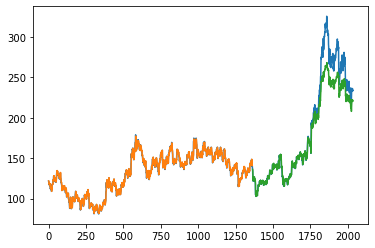

In [79]:
# shift train predictions for plotting
train_Plot = np.empty_like(df)
train_Plot[:, :] = np.nan
train_Plot[targetting:len(train_Predict)+targetting, :] = train_Predict
# shift test predictions for plotting
test_Plot = np.empty_like(df)
test_Plot[:, :] = np.nan
test_Plot[len(train_Predict)+(targetting*2)+1:len(df)-1, :] = test_Predict
# plot baseline and predictions
plt.plot(scaling.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()